<a href="https://colab.research.google.com/github/arifnayan2861/DA/blob/main/handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#finding missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [10]:
#deleting rows
print(df.shape)
print(df.dropna().shape)

(891, 15)
(182, 15)


In [16]:
#deleting column
print(df.shape)
print(df.dropna(axis=1).shape)

(891, 15)
(891, 11)


# Impitution missing values

## Mean value imputation
### Mean value imputation works well when the data is normally distributed

<Axes: xlabel='age', ylabel='Count'>

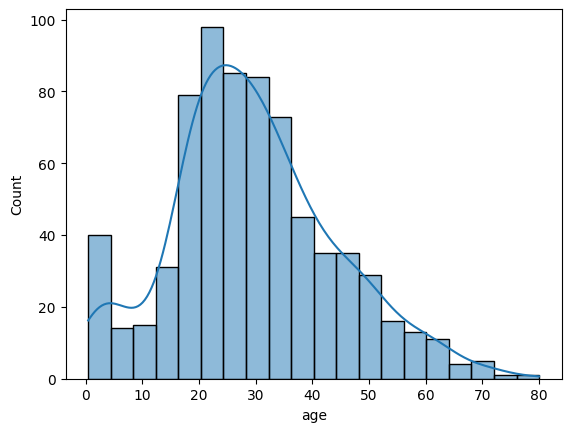

In [18]:
#mean value imputation
sns.histplot(df['age'], kde=True)

In [39]:
df['age_mean']=df['age'].fillna(df['age'].mean())
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [40]:
df[['age', 'age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


<Axes: xlabel='age', ylabel='Count'>

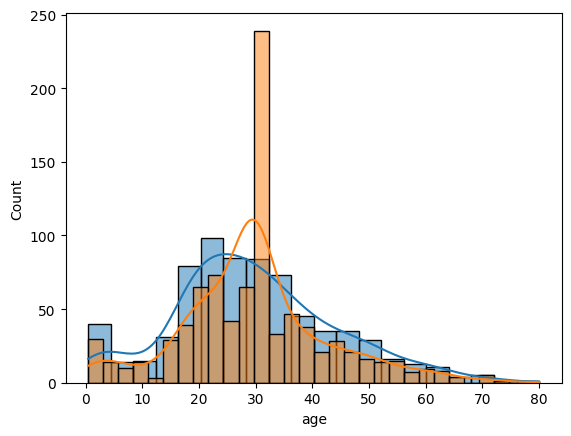

In [43]:
sns.histplot(df['age'], kde=True)
sns.histplot(df['age_mean'], kde=True)

## Median value imputation
### Median value imputation works well when the data is skewed(the data has outliers)

In [47]:
df['age_median']= df['age'].fillna(df['age'].median())
df[['age', 'age_mean', 'age_median']]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


<Axes: xlabel='age', ylabel='Count'>

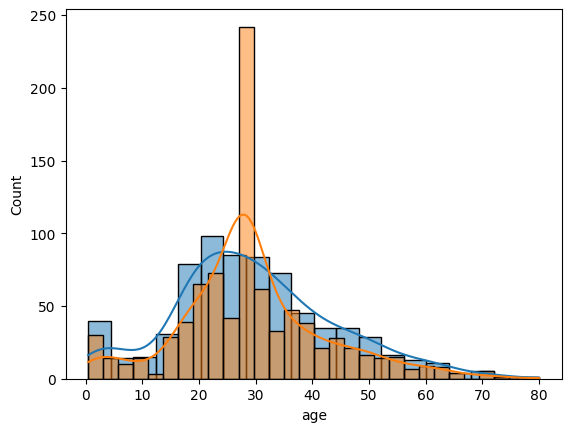

In [46]:
sns.histplot(df['age'], kde=True)
sns.histplot(df['age_median'], kde=True)

## Mode value imputation
### Mode value imputation works well with categorical values

In [49]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [55]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [56]:
df['embarked_mode']=df['embarked'].fillna(mode_value)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S


In [61]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S
